## Setup & Load Data

### install Dependencies 

In [2]:
!pip install tensorflow opencv-python matplotlib

  Using cached tensorflow-2.18.0-cp311-cp311-macosx_12_0_arm64.whl.metadata (4.0 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.5/239.5 MB 65.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.8/54.8 MB 71.8 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 62.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 54.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 39.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.8/25.8 MB 65.6 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 68.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 65.7 MB/s eta 0:00:00


In [3]:
!pip list

Package                      Version
---------------------------- ------------
absl-py                      2.1.0
annotated-types              0.7.0
anyio                        3.7.1
appnope                      0.1.3
argon2-cffi                  23.1.0
argon2-cffi-bindings         21.2.0
arrow                        1.2.3
asttokens                    2.2.1
astunparse                   1.6.3
async-lru                    2.0.4
attrs                        24.2.0
Babel                        2.12.1
backcall                     0.2.0
beautifulsoup4               4.12.2
bleach                       6.0.0
catalogue                    2.0.10
certifi                      2023.7.22
cffi                         1.15.1
charset-normalizer           3.2.0
chart-studio                 1.1.0
click                        8.1.7
cloudpathlib                 0.20.0
cmdstanpy                    1.2.4
comm                         0.1.4
confection                   0.1.5
contourpy                    1.2.0

In [103]:
import tensorflow as tf
import os

In [104]:
os.path.join('data', 'Good')

'data/Good'

In [105]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [106]:
tf.config.list_physical_devices('CPU')

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [107]:
pip install pillow

Note: you may need to restart the kernel to use updated packages.


## Images

In [108]:
import cv2
import imghdr

In [109]:
data_dir = 'data' 

In [110]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [111]:
os.listdir(data_dir)

['.DS_Store', 'Spoilt', 'Good', '.ipynb_checkpoints']

In [112]:
import os
print(os.getcwd())

/Users/kiranverma/Python Projects/Use Case 1/Imageclassification


In [118]:
# Define the data directory and supported image formats
data_dir = "data"  # Update with your actual directory path
image_exts = ['jpeg', 'jpg', 'png', 'bmp', 'gif']  # Supported image extensions

for image_class in os.listdir(data_dir): 
    class_path = os.path.join(data_dir, image_class)
    
    # Skip non-directory files
    if not os.path.isdir(class_path):
        continue  # No log for non-directory files like .DS_Store
    
    for image in os.listdir(class_path):
        image_path = os.path.join(class_path, image)
        
        # Skip hidden or system files silently
        if image.startswith('.') or ".ipynb_checkpoints" in image_path:
            continue
        
        try:
            # Check the file extension and remove unsupported formats
            ext = os.path.splitext(image)[-1].lower().lstrip('.')
            if ext not in image_exts or imghdr.what(image_path) not in image_exts:
                os.remove(image_path)
                continue
            
            # Attempt to read the image using OpenCV
            img = cv2.imread(image_path)
            if img is None:
                os.remove(image_path)
        except Exception as e:
            # Optionally handle errors
            pass

libpng warning: iCCP: known incorrect sRGB profile


## Load Data

In [119]:
import numpy as np
from matplotlib import pyplot as plt

In [121]:
# using keras utility data pipeline to build a dataset on the fly
data = tf.keras.utils.image_dataset_from_directory('data')

Found 267 files belonging to 2 classes.


In [122]:
data

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [123]:
# Numpy iterator
data_iterator = data.as_numpy_iterator()

In [124]:
data_iterator

NumpyIterator(iterator=<tensorflow.python.data.ops.iterator_ops.OwnedIterator object at 0x30f962010>)

In [125]:
batch = data_iterator.next()

2024-11-22 14:52:30.267687: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


In [126]:
batch

(array([[[[247.       , 251.       , 254.       ],
          [247.       , 251.       , 254.       ],
          [247.       , 251.       , 254.       ],
          ...,
          [243.       , 243.       , 245.       ],
          [243.       , 243.       , 245.       ],
          [243.       , 243.       , 245.       ]],
 
         [[247.       , 251.       , 254.       ],
          [247.       , 251.       , 254.       ],
          [247.       , 251.       , 254.       ],
          ...,
          [250.53906  , 250.53906  , 252.53906  ],
          [250.53906  , 250.53906  , 252.53906  ],
          [250.53906  , 250.53906  , 252.53906  ]],
 
         [[247.       , 251.       , 254.       ],
          [247.       , 251.       , 254.       ],
          [247.       , 251.       , 254.       ],
          ...,
          [251.23047  , 251.23047  , 253.23047  ],
          [251.23047  , 251.23047  , 253.23047  ],
          [251.23047  , 251.23047  , 253.23047  ]],
 
         ...,
 
         [[2

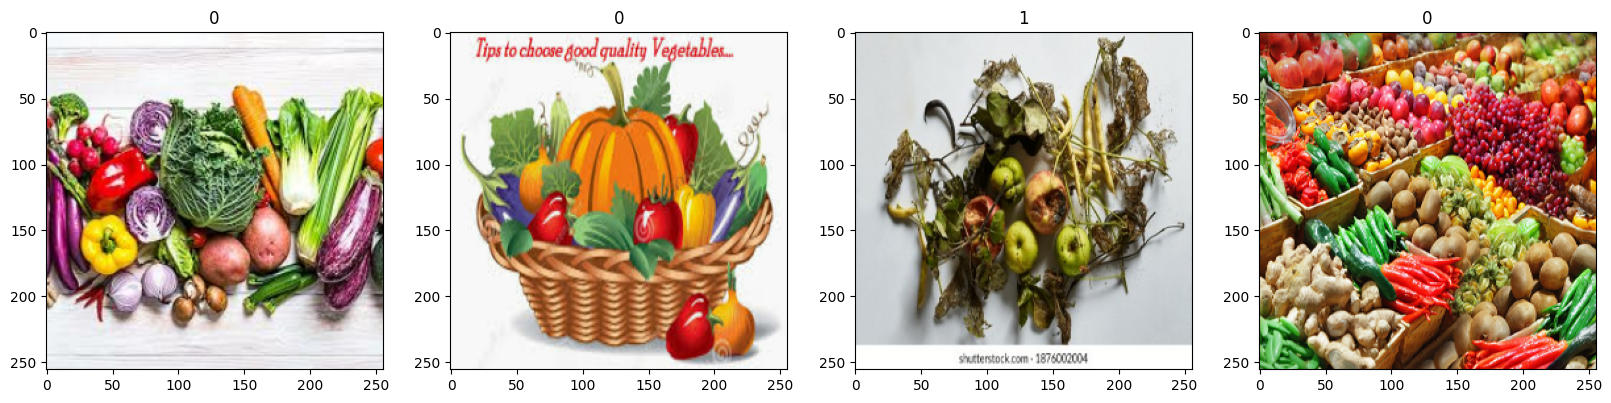

In [127]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# Preprocess Data

## Scaling Data

In [128]:
data = data.map(lambda x,y: (x/255, y))

In [129]:
data.as_numpy_iterator().next()

2024-11-22 14:52:46.201143: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-11-22 14:52:46.267624: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate


(array([[[[9.73651946e-01, 9.89338219e-01, 1.00000000e+00],
          [9.73958313e-01, 9.89644587e-01, 1.00000000e+00],
          [9.77573514e-01, 9.93259788e-01, 1.00000000e+00],
          ...,
          [9.44485307e-01, 9.44485307e-01, 9.52328444e-01],
          [9.38836575e-01, 9.38836575e-01, 9.46679711e-01],
          [9.43382382e-01, 9.43382382e-01, 9.51225519e-01]],
 
         [[9.63235319e-01, 9.78921592e-01, 9.90073502e-01],
          [9.63283181e-01, 9.78969455e-01, 9.90073502e-01],
          [9.66484785e-01, 9.82171059e-01, 9.92710233e-01],
          ...,
          [9.92647052e-01, 9.92647052e-01, 9.93872523e-01],
          [9.81801450e-01, 9.81801450e-01, 9.89127576e-01],
          [9.88026559e-01, 9.88026559e-01, 9.91630256e-01]],
 
         [[9.56985295e-01, 9.72671568e-01, 9.84436274e-01],
          [9.56860840e-01, 9.72547114e-01, 9.84311819e-01],
          [9.57247615e-01, 9.72933888e-01, 9.84698594e-01],
          ...,
          [9.68566179e-01, 9.68566179e-01, 9.7640

## Split Data

In [130]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [131]:
train_size

6

In [132]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

## Building The deep learning model

In [133]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [134]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [135]:
model = Sequential()

In [136]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [137]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [138]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

## Train

In [139]:
logdir='logs'

In [140]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [141]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20


2024-11-22 14:53:11.589575: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-11-22 14:53:12.292948: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 728ms/step - accuracy: 0.4786 - loss: 1.0813

2024-11-22 14:53:17.453777: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-11-22 14:53:17.519781: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate


6/6 ━━━━━━━━━━━━━━━━━━━━ 7s 908ms/step - accuracy: 0.4786 - loss: 1.0655 - val_accuracy: 0.6562 - val_loss: 0.6617
Epoch 2/20


2024-11-22 14:53:18.455538: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate
2024-11-22 14:53:18.526111: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 845ms/step - accuracy: 0.6018 - loss: 0.6766

2024-11-22 14:53:23.589035: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-11-22 14:53:23.592024: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate


6/6 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.6007 - loss: 0.6777 - val_accuracy: 0.6562 - val_loss: 0.5783
Epoch 3/20


2024-11-22 14:53:25.141282: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-11-22 14:53:25.776246: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 809ms/step - accuracy: 0.5766 - loss: 0.6579

2024-11-22 14:53:30.456174: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-11-22 14:53:30.572626: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate


6/6 ━━━━━━━━━━━━━━━━━━━━ 7s 988ms/step - accuracy: 0.5909 - loss: 0.6537 - val_accuracy: 0.9688 - val_loss: 0.4821
Epoch 4/20


2024-11-22 14:53:31.800125: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate
2024-11-22 14:53:31.836057: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 686ms/step - accuracy: 0.8495 - loss: 0.5097

2024-11-22 14:53:36.077200: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-11-22 14:53:36.279105: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate


6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 874ms/step - accuracy: 0.8472 - loss: 0.5102 - val_accuracy: 0.8125 - val_loss: 0.4163
Epoch 5/20


2024-11-22 14:53:38.447989: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-11-22 14:53:38.592818: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 674ms/step - accuracy: 0.7506 - loss: 0.4952

2024-11-22 14:53:43.001530: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-11-22 14:53:43.072844: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate


6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 897ms/step - accuracy: 0.7490 - loss: 0.4981 - val_accuracy: 0.8438 - val_loss: 0.3995
Epoch 6/20


2024-11-22 14:53:43.361564: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-11-22 14:53:43.930350: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 676ms/step - accuracy: 0.8198 - loss: 0.3693

2024-11-22 14:53:48.104665: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-11-22 14:53:48.488399: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate


6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 824ms/step - accuracy: 0.8217 - loss: 0.3684 - val_accuracy: 0.8750 - val_loss: 0.3997
Epoch 7/20


2024-11-22 14:53:49.282911: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate
2024-11-22 14:53:49.645933: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 798ms/step - accuracy: 0.9455 - loss: 0.3006

2024-11-22 14:53:54.767286: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-11-22 14:53:54.792977: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate


6/6 ━━━━━━━━━━━━━━━━━━━━ 7s 963ms/step - accuracy: 0.9436 - loss: 0.3005 - val_accuracy: 0.9062 - val_loss: 0.2638
Epoch 8/20


2024-11-22 14:53:55.905208: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate
2024-11-22 14:53:56.182549: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 820ms/step - accuracy: 0.8900 - loss: 0.2369

2024-11-22 14:54:01.002182: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate
2024-11-22 14:54:01.424042: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.8953 - loss: 0.2320 - val_accuracy: 0.9688 - val_loss: 0.1085
Epoch 9/20


2024-11-22 14:54:01.989098: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-11-22 14:54:03.074426: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 663ms/step - accuracy: 0.9741 - loss: 0.1060

2024-11-22 14:54:06.985670: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate
2024-11-22 14:54:07.127941: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 833ms/step - accuracy: 0.9734 - loss: 0.1082 - val_accuracy: 0.9375 - val_loss: 0.1515
Epoch 10/20


2024-11-22 14:54:08.548844: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-11-22 14:54:08.690812: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 876ms/step - accuracy: 0.9925 - loss: 0.0834

2024-11-22 14:54:13.552627: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate
2024-11-22 14:54:13.560205: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


6/6 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.9899 - loss: 0.0863 - val_accuracy: 1.0000 - val_loss: 0.0488
Epoch 11/20


2024-11-22 14:54:14.201468: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate


1/6 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 1.0000 - loss: 0.0860

2024-11-22 14:54:15.280418: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 824ms/step - accuracy: 0.9866 - loss: 0.0711

2024-11-22 14:54:20.431379: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-11-22 14:54:20.604568: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate


6/6 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.9863 - loss: 0.0695 - val_accuracy: 1.0000 - val_loss: 0.0197
Epoch 12/20


2024-11-22 14:54:21.458856: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-11-22 14:54:21.550251: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 670ms/step - accuracy: 0.9689 - loss: 0.0773

2024-11-22 14:54:25.934263: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-11-22 14:54:26.037666: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate


6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 848ms/step - accuracy: 0.9704 - loss: 0.0744 - val_accuracy: 1.0000 - val_loss: 0.0430
Epoch 13/20


2024-11-22 14:54:26.948978: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


1/6 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.9688 - loss: 0.0344

2024-11-22 14:54:28.018059: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 729ms/step - accuracy: 0.9747 - loss: 0.0417

2024-11-22 14:54:31.804345: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-11-22 14:54:32.153333: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate


6/6 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.9761 - loss: 0.0410 - val_accuracy: 1.0000 - val_loss: 0.0141
Epoch 14/20


2024-11-22 14:54:33.988309: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-11-22 14:54:34.254189: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 868ms/step - accuracy: 0.9823 - loss: 0.0270

2024-11-22 14:54:39.564699: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate
2024-11-22 14:54:40.309501: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


6/6 ━━━━━━━━━━━━━━━━━━━━ 8s 1s/step - accuracy: 0.9818 - loss: 0.0289 - val_accuracy: 1.0000 - val_loss: 0.0294
Epoch 15/20


2024-11-22 14:54:41.090548: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate
2024-11-22 14:54:41.663936: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 668ms/step - accuracy: 0.9927 - loss: 0.0267

2024-11-22 14:54:45.700200: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-11-22 14:54:45.865768: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate


6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 834ms/step - accuracy: 0.9915 - loss: 0.0269 - val_accuracy: 1.0000 - val_loss: 0.0056
Epoch 16/20


2024-11-22 14:54:46.544595: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-11-22 14:54:47.522560: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 709ms/step - accuracy: 0.9823 - loss: 0.0257

2024-11-22 14:54:51.533969: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate
2024-11-22 14:54:51.755097: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 902ms/step - accuracy: 0.9833 - loss: 0.0245 - val_accuracy: 0.9688 - val_loss: 0.0349
Epoch 17/20


2024-11-22 14:54:52.341082: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate
2024-11-22 14:54:52.371630: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 670ms/step - accuracy: 0.9872 - loss: 0.0159

2024-11-22 14:54:56.911658: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate
2024-11-22 14:54:57.063876: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 837ms/step - accuracy: 0.9883 - loss: 0.0152 - val_accuracy: 1.0000 - val_loss: 0.0258
Epoch 18/20


2024-11-22 14:54:57.746553: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile
2024-11-22 14:54:57.972723: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 678ms/step - accuracy: 0.9916 - loss: 0.0191

2024-11-22 14:55:02.655689: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate
2024-11-22 14:55:02.695327: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 856ms/step - accuracy: 0.9913 - loss: 0.0197 - val_accuracy: 0.9688 - val_loss: 0.0314
Epoch 19/20


2024-11-22 14:55:03.220240: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate
2024-11-22 14:55:04.204036: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 705ms/step - accuracy: 0.9918 - loss: 0.0178

2024-11-22 14:55:08.515664: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate
2024-11-22 14:55:08.878913: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


6/6 ━━━━━━━━━━━━━━━━━━━━ 6s 1000ms/step - accuracy: 0.9915 - loss: 0.0181 - val_accuracy: 1.0000 - val_loss: 0.0039
Epoch 20/20


2024-11-22 14:55:09.666206: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate
2024-11-22 14:55:09.688525: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 889ms/step - accuracy: 0.9782 - loss: 0.0194

2024-11-22 14:55:15.376292: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: eXIf: duplicate
2024-11-22 14:55:16.240570: W tensorflow/core/lib/png/png_io.cc:89] PNG warning: iCCP: known incorrect sRGB profile


6/6 ━━━━━━━━━━━━━━━━━━━━ 7s 1s/step - accuracy: 0.9783 - loss: 0.0196 - val_accuracy: 1.0000 - val_loss: 0.0018


## Plot Performance

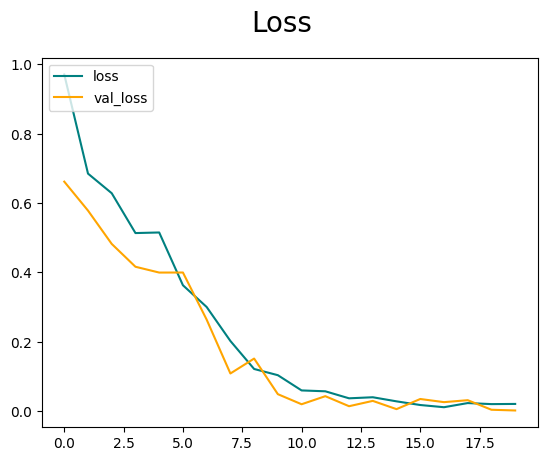

In [142]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

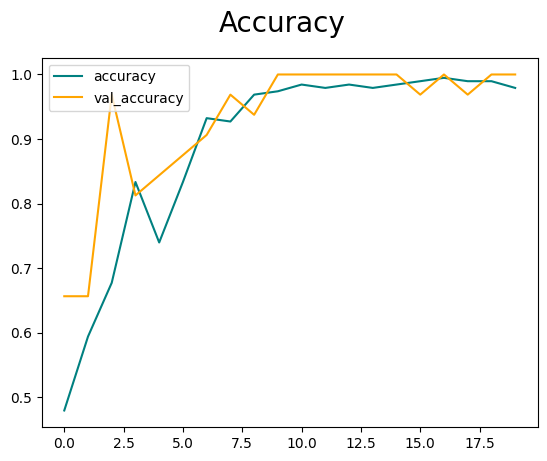

In [143]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

## Evaluate

In [144]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy


In [145]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()


In [146]:
try:
    for batch in test.as_numpy_iterator():
        X, y = batch
        yhat = model.predict(X)
        pre.update_state(y, yhat)
        re.update_state(y, yhat)
        acc.update_state(y, yhat)
except tf.errors.OutOfRangeError:
    print("End of dataset reached.")

In [147]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32)


## Test

In [157]:


file_path = 'data/Good/17-Tricks.jpg'
if os.path.exists(file_path):
    print("File exists.")
else:
    print("File not found.")


File exists.


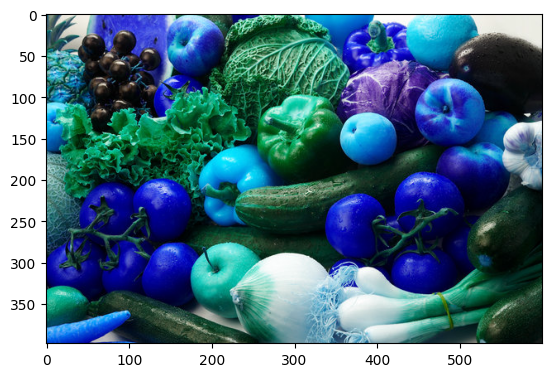

In [169]:
file_path = 'data/Good/17-Tricks.jpg'
img = cv2.imread(file_path)
plt.imshow(img)
plt.show()

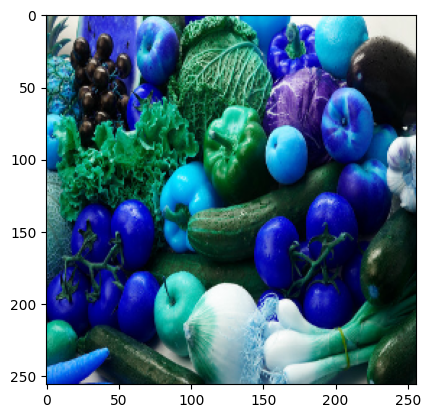

In [159]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()


In [160]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


In [161]:
yhat

array([[0.00365526]], dtype=float32)

In [162]:
if yhat > 0.5: 
    print(f'Predicted class is in Good Condition')
else:
    print(f'Predicted class is in Bad Condition')

Predicted class is in Bad Condition
